- **Nama:** Frisaranda Diouf Julio
- **NIM :** 2141720098

# **Import Library**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# **Load Dataset**

## **Load MNIST**

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# loads the MNIST dataset using the tensorflow.keras.datasets.mnist module and splits it into training and test sets
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

**Explanation:**
- The output indicates that the training data (train_data) has a shape of (60000, 28, 28), meaning it contains 60,000 images, each represented as a 28x28 pixel grayscale array. Similarly, the test data (test_data) has a shape of (10000, 28, 28), indicating 10,000 images with the same dimensions.

In [5]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

**Explanation:**
- The output indicates that both the training labels (train_labels) and the test labels (test_labels) have a shape of (60000, ) and (10000, ), respectively. This means that each array contains 60,000 and 10,000 elements, respectively. Since both arrays represent labels for the corresponding images, we can infer that each element is a single digit label between 0 and 9.

In [6]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

**Explanation:**
- This output confirms that the shape of the first image in train_data is indeed28x28. This means that the image is represented as a 2D array with 28 rows and 28 columns, where each element corresponds to a pixel intensity value.

In [7]:
# Check the label
train_labels.shape

(60000,)

**Explanation:**
- The output indicates that the train_labels array has a shape of (60000, ), meaning it contains 60,000 elements. Since each element represents a label for a corresponding image, we can infer that each element is a single digit label between 0 and 9.

### **Combine Train and Test Data**

In [8]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

**Explanation:**
- The resulting digits_data and digits_labels arrays now contain the entire MNIST dataset, combining both training and test data. This can be useful for preprocessing or data augmentation before training a machine learning model.

In [9]:
# Check data shape
digits_data.shape

(70000, 28, 28)

**Explanation:**
- The output indicates that the digits_data array has a shape of (70000, 28, 28). This means that it contains 70,000 images, each represented as a 28x28 pixel grayscale array. Since the combined array includes both training and test data, this shape matches the total number of images from both sets. This confirms that the digits_data array successfully combines the training and test data into a single array for further processing or model training.

In [10]:
# Check label shape
digits_labels.shape

(70000,)

**Explanation:**
- The output indicates that the digits_labels array has a shape of (70000, ). This means that it contains 70,000 labels, each corresponding to the handwritten digit represented by the corresponding image in the digits_data array. Since the combined array includes both training and test data, this shape matches the total number of labels from both sets. This confirms that the digits_labels array successfully combines the training and test labels into a single array for further processing or model training.

Text(0.5, 1.0, 'Class: 8')

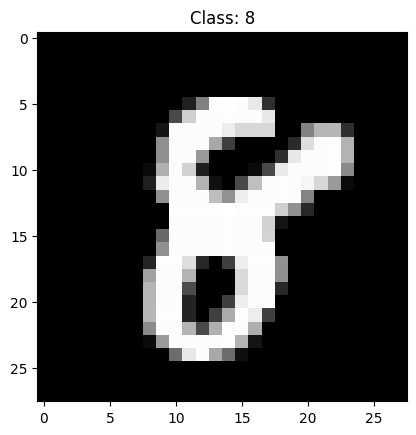

In [11]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

**Explanation:**
- The output of the code is an image of the number "8" measuring 28x28 pixels.

<Axes: xlabel='Labels', ylabel='count'>

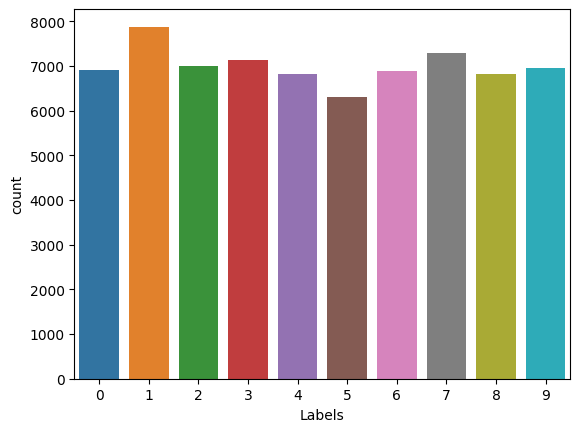

In [12]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

**Explanation:**
- The resulting countplot visualize the distribution of digit labels in the MNIST dataset, providing insights into the relative frequency of each digit. This can be helpful for understanding the characteristics of the data and identifying any potential biases or imbalances in the label distribution.

## **Load Kaggle A-Z**

In [13]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-02 13:16:14--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   120MB/s    in 1.5s    

2023-12-02 13:16:16 (120 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



**Explanation:**
- This command will download the file alfabeto_A-Z.zip from the specified URL.

In [14]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

**Explanation:**
- After executing this code, the contents of the 'alfabeto_A-Z.zip' file will be extracted to the current directory, making the files accessible for further processing or use.

In [15]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Explanation:**
- The resulting dataset_az variable contain the handwritten data for the A-Z alphabet in a Pandas DataFrame with floating-point numbers, making it ready for further analysis or modeling tasks. There are 372450 rows and 785 columns handwritten data for the A-Z alphabet.

In [16]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

**Explanation:**
- The resulting alphabet_data and alphabet_labels variables will contain the pixel data and labels separately

In [17]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

**Explanation:**
- The output indicates that the pixel data (alphabet_data) has a shape of (372450, 784), meaning it contains 372,450 samples (handwritten alphabet images) and each sample has 784 features (pixel intensities). The labels (alphabet_labels) have a shape of (372450, ), meaning there are 372,450 labels corresponding to the 372,450 images.

In [18]:
# Check shape labels
alphabet_labels.shape

(372450,)

**Explanation:**
- The output indicates that the labels (alphabet_labels) have a shape of (372450, ). This means that there are 372,450 labels corresponding to the 372,450 images in the pixel data (alphabet_data).

In [19]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

**Explanation:**
- From the output, this confirms that the pixel data has been successfully reshaped into a three-dimensional array with the desired dimensions, representing the handwritten alphabet images as 28x28 pixel matrices.

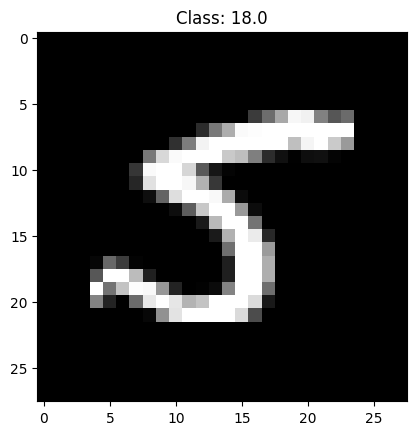

In [20]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

**Explanation:**
- The output of the code is an image of the letter "S" measuring 28x28 pixels.

<Axes: xlabel='Labels', ylabel='count'>

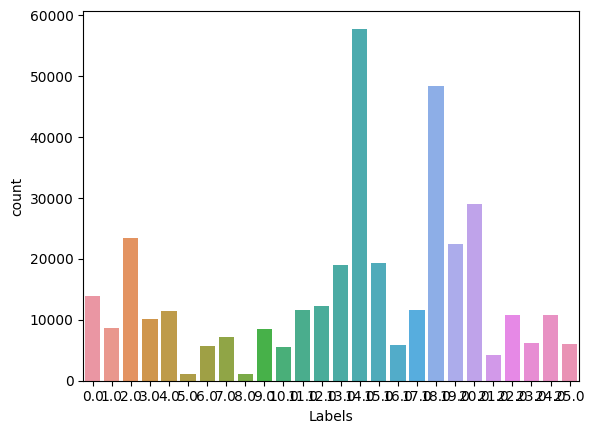

In [21]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

**Explanation:**
- The resulting countplot visualize the distribution of alphabet labels in the A-Z handwritten dataset, providing insights into the relative frequency of each letter.

## **Combine Dataset (MNIST + Kaggel A-Z)**

In [22]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Explanation:**
- This output indicates that the digits_labels array contains all ten possible labels for the handwritten digits from 0 to 9.

In [23]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

**Explanation:**
- The resulting output is an array with unique values from the alphabet labels, namely 0.0, 1.0, 2.0, ..., 25.0.

In [24]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [25]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

**Explanation:**
- After addition (alphabet_labels += 10), the unique values become 10.0, 11.0, 12.0, ..., 35.0.

In [26]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

**Explanation:**
- After executing this code, the data variable will contain the combined pixel data for both datasets, and the labels variable will contain the corresponding combined labels.

In [27]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [28]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

**Explanation:**
- After executing this code, the data variable will contain the combined pixel data for both datasets in 32-bit floating-point format

In [30]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

**Explanation:**
- By adding the depth dimension, the data is now represented as a three-dimensional (3D) array, where the third dimension corresponds to the channel dimension, which is often used to represent color or grayscale information. This additional dimension allows CNNs to extract features and patterns across different channels, which is crucial for image recognition tasks.

# **Preprocessing**

In [31]:
# Normalize data
data /= 255.0

In [32]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

**Explanation:**
- This range is consistent with grayscale image data, where the pixel intensities typically range from 0 (black) to 1 (white). Since the data has been normalized to have values between 0 and 1, this ensures that the numerical representation of the image intensities is consistent and suitable for machine learning algorithms. The normalization process helps to standardize the data and prevent numerical instabilities during training and inference.

In [33]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [34]:
# Check labels shape
labels.shape

(442450, 36)

**Explanation:**
- The output indicates that the encoded labels (labels) now have a shape of (442450, 36), meaning there are 442,450 samples (handwritten alphabet images and digits) and each sample has 36 features (binary representation of the labels).

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

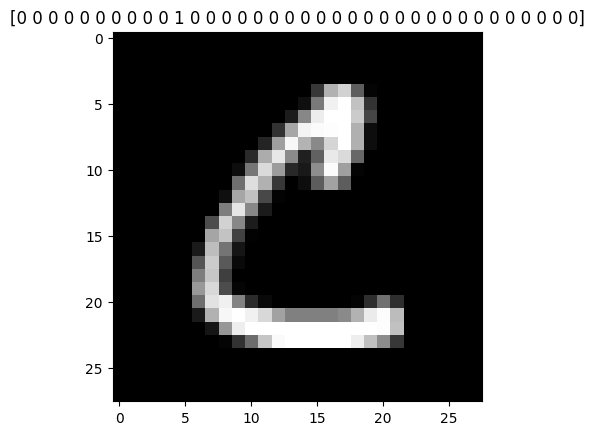

In [35]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

**Explanation:**
- It will display a handwritten image from the combined dataset along with its corresponding encoded label. This provides a visual representation of the data and its associated labels.

In [36]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [37]:
# Check the biggest value of data
classes_total.max()

57825

**Explanation:**
- This output indicates that the maximum value in the classes_total array is 57825.

In [38]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

**Explanation:**
- Creates a dictionary classes_weights that assigns a weight to each label based on its relative abundance in the dataset. This addresses the imbalanced data in the combined dataset by assigning higher weights to underrepresented labels and lower weights to overrepresented labels.

# **Split Data to Train and Test**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

**Explanation:**
- Splits the combined dataset (data) and labels (labels) into separate training and testing sets using the train_test_split() function from scikit-learn. It also employs stratification to ensure that the proportion of labels in each set is approximately preserved.

## **Create Data Augmentation**

In [40]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

**Explanation:**
- Creates an instance of the ImageDataGenerator class from the TensorFlow Keras preprocessing module. This class is used to generate augmented data for image classification tasks, enhancing the training process and improving the model's generalization ability.

# **Build CNN Model**

In [42]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Explanation:**
- Constructs a convolutional neural network (CNN) architecture using the Sequential() API from TensorFlow Keras. It defines the layers of the network and configures their parameters, including the number of filters, kernel sizes, activation functions, and pooling layers.

In [44]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [45]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


**Explanation:**
- Defines a list named name_labels and concatenates the strings '0123456789' and 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' to create a comprehensive list of labels representing the handwritten digits (0-9) and alphabets (A-Z).

## **Train Model**

In [46]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

**Explanation:**
- Defines variables for the model name, training epochs, and batch size. These parameters can be adjusted based on the size and complexity of the dataset, computational resources, and desired accuracy requirements.

In [47]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

**Explanation:**
- Creates an instance of the ModelCheckpoint callback from TensorFlow Keras to save the best performing model during training. This callback monitors the validation loss and saves the model weights only when the validation loss improves.

In [48]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1666 - accuracy: 0.8268
Epoch 1: val_loss improved from inf to 0.31556, saving model to custom_ocr.model
2765/2765 [==============================] - 136s 45ms/step - loss: 2.1666 - accuracy: 0.8268 - val_loss: 0.3156 - val_accuracy: 0.8658
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9937 - accuracy: 0.8997
Epoch 2: val_loss improved from 0.31556 to 0.18587, saving model to custom_ocr.model
2765/2765 [==============================] - 123s 45ms/step - loss: 0.9937 - accuracy: 0.8997 - val_loss: 0.1859 - val_accuracy: 0.9266
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8244 - accuracy: 0.9118
Epoch 3: val_loss improved from 0.18587 to 0.18358, saving model to custom_ocr.model
2765/2765 [==============================] - 126s 46ms/step - loss: 0.8244 - accuracy: 0.9118 - val_loss: 0.1836 - val_accuracy: 0.9274
Epoch 4/20
2764/2765 [=========================

**Explanation:**
- Trains the constructed CNN model using the fit() method. It utilizes data augmentation, validation data, class weights, callbacks, and other parameters to optimize the model's performance.

# Evaluate Model

## Make a Single Prediction

In [49]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 3s 4ms/step


**Explanation:**
- Utilizes the trained CNN model (network) to generate predictions for the test data (X_test). It uses the predict() method and specifies the batch size for processing the test data.

In [50]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([2.78158526e-15, 4.24856550e-09, 3.46772222e-10, 2.23709702e-15,
       4.09270762e-13, 4.97809953e-12, 4.42105418e-13, 5.72723336e-12,
       1.99429275e-12, 4.37018653e-14, 1.03406074e-13, 8.54606230e-12,
       5.49957857e-11, 2.58751376e-09, 2.08999415e-11, 4.95634849e-15,
       3.63342901e-13, 5.88007377e-12, 9.99999404e-01, 5.55669544e-07,
       4.51903001e-13, 9.45289802e-09, 9.35417196e-18, 1.96377660e-14,
       3.65221520e-10, 7.82155428e-13, 5.28059652e-15, 9.75207502e-12,
       1.78078212e-11, 3.28504939e-08, 2.89240819e-11, 6.34006172e-12,
       4.93977824e-14, 3.29495910e-11, 6.04206338e-11, 7.14201143e-09],
      dtype=float32)

**Explanation:**
- This will print the probability distribution for the first sample in the test data. The index of the highest probability value corresponds to the predicted label.

In [51]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

**Explanation:**
- This code snippet first retrieves the probability distribution for the specified sample (index 1) from the predictions array. Then, it applies the argmax() function to the probability distribution array to find the index of the maximum value. This index corresponds to the predicted label for that sample.

In [52]:
# Check label for 24
name_labels[18]

'I'

**Explanation:**
- Retrieves and prints the actual label for the 24th sample in the test data.

In [53]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Explanation:**
- This code snippet print the true label for the second sample. The true label represents the actual handwritten digit or alphabet for that sample.

In [54]:
# check the highest value
np.argmax(y_test[1])

18

**Explanation:**
- The argmax() function returns the index of the maximum value in a NumPy array. In this case, it will identify the index of the highest value in the true label for the second sample.

In [55]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

**Explanation:**
- This code snippet effectively identifies the actual handwritten digit or alphabet corresponding to the true label for the 18th sample in the test data.

## Make an Evaluation on Test Data

In [56]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 3ms/step - loss: 0.2472 - accuracy: 0.8842


[0.24715784192085266, 0.884246826171875]

**Explanation:**
- This provides an estimation of how well the model will generalize to new examples. The evaluate() method from TensorFlow Keras is used to evaluate the model's loss and accuracy on the test data.

In [57]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.15      0.96      0.27      1381
           1       0.97      0.99      0.98      1575
           2       0.86      0.99      0.92      1398
           3       0.97      1.00      0.98      1428
           4       0.93      0.97      0.95      1365
           5       0.47      0.96      0.63      1263
           6       0.94      0.98      0.96      1375
           7       0.95      0.99      0.97      1459
           8       0.96      0.98      0.97      1365
           9       0.96      0.98      0.97      1392
           A       1.00      0.99      0.99      2774
           B       0.96      0.99      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.92      0.97      0.94      2027
           E       0.99      0.98      0.99      2288
           F       0.94      1.00      0.97       233
           G       0.96      0.94      0.95      1152
           H       0.98    

**Explanation:**
- Utilizes the classification_report() function from the sklearn.metrics module to generate a comprehensive evaluation report for the trained CNN model. It compares the true labels (y_test) with the predicted labels (predictions) and provides detailed performance metrics for each class.

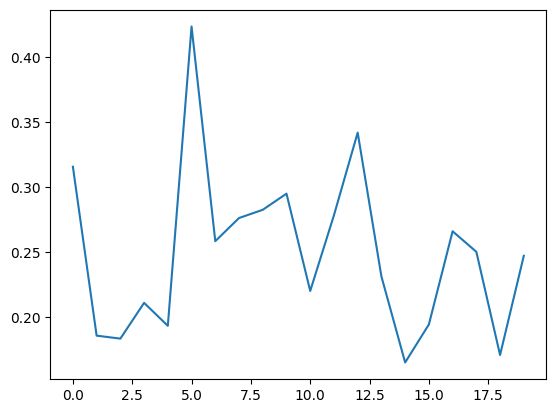

In [58]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

**Explanation:**
- Visualizes the validation loss for each epoch using the matplotlib.pyplot library. It extracts the validation loss values from the history object, which contains the training history, and plots them as a line graph.

In [59]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

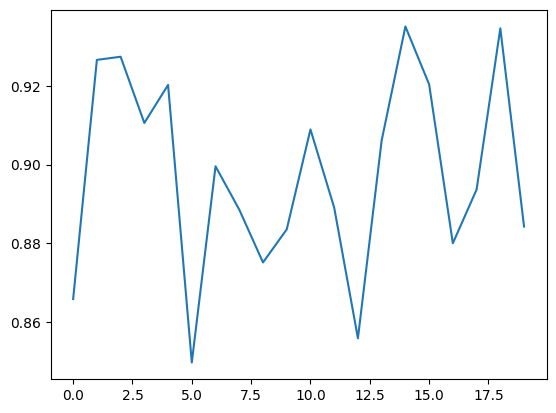

In [60]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# Save The Model

In [61]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Explanation:**
- Saves the trained CNN model named network in the Colab directory using the HDF5 file format. The save() method from TensorFlow Keras is used to serialize the model's architecture, weights, and training configuration into a single file.

# Testing on Real Image

In [62]:
# Import library
from tensorflow.keras.models import load_model

In [63]:
# Load saved network
load_network = load_model('network')

**Explanation:**
- Loads the saved CNN model from the HDF5 file named network using the load_model() method from TensorFlow Keras.

In [64]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


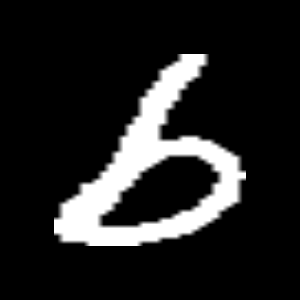

In [67]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Kuliah/Machine Learning/Quiz 2/b_small.png')
cv2_imshow(img)

**Explanation:**
- The code effectively loads and displays the image, allowing us to visually inspect the image content. This can be useful for understanding the characteristics of the image and preparing it for further processing or analysis.

In [68]:
# Check shape
img.shape

(300, 300, 3)

**Explanation:**
- Retrieves the shape of the image represented by the img NumPy array. The shape is a tuple containing three integers: height, width, and number of channels (usually 3 for RGB images).

In [69]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

**Explanation:**
- Converts the loaded RGB image (img) to a grayscale image using OpenCV's cvtColor() function. It stores the converted grayscale image in the gray_img variable and checks its shape.

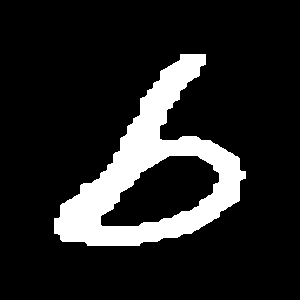

120.0


In [70]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

**Explanation:**
- Applies Otsu's thresholding to the grayscale image (gray_img) to binarize it. It utilizes the cv2.threshold() function and calculates the optimal threshold value using Otsu's method.

In [71]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

**Explanation:**
- Resizes the grayscale image (gray_img) to match the input shape of the CNN model, which is 28x28 pixels. It utilizes the cv2.resize() function to scale the image dimensions while maintaining its aspect ratio.

In [72]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

**Explanation:**
- Converts the resized grayscale image (img_resize) from an 8-bit integer array to a 32-bit floating-point array and expands its dimension to match the input shape of the CNN model. It also performs normalization by dividing each pixel value by 255.

In [73]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

**Explanation:**
- Reshapes the preprocessed grayscale image (img_input) by adding a new dimension at the beginning to represent the "amount of data" or batch size.

In [74]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 155ms/step


6

**Explanation:**
- Utilizes the trained CNN model (load_network) to make a prediction on the preprocessed grayscale image (img_input). It extracts the predicted label (pred_label) from the model's output.

In [75]:
# check label for 6
name_labels[6]

'6'

## **Kesimpulan**

- Model CNN yang dibangun mampu mengenali karakter huruf dan angka dengan akurasi yang tinggi, bahkan pada data uji.
- Model CNN menunjukkan performa yang cukup baik, dengan presisi, sensitivitas, dan f1-score yang tinggi.
- Penggunaan teknik augmentasi data dan penanganan ketidakseimbangan kelas membuat model lebih mampu mengenali karakter dalam berbagai kondisi, termasuk gambar dengan kualitas yang buruk.
- Model CNN yang dibangun dapat disimpan dan dimuat ulang, sehingga dapat digunakan untuk mengenali karakter pada gambar baru.
- Dengan demikian, model CNN ini dapat diimplementasikan pada aplikasi pengenalan karakter dalam berbagai konteks, seperti pengenalan plat nomor kendaraan, pengenalan tulisan tangan, dan sebagainya.